# Pixelwise Visible Ground Plane and Complete Ground Plane

In [72]:
import os
import numpy as np
import pandas as pd
import scipy
import path 
from matplotlib import pyplot as plt
import json
from PIL import Image, ImageStat
from sklearn.linear_model import LinearRegression
from scipy import stats
import math

## Load Behavioral Data

In [73]:
# TAC_raw_individual_trial_data_path = '/Users/prachi/Documents/depth_duration/depth_duration_analysis/TAC_npy_files/TAC_raw_individual_trial_data/'

# TAC_raw_individual_trial_data_path  = '/Users/prachimahableshwarkar/Documents/GW/Depth_MTurk/verbal_judgement_analysis/data/TAC_npy_files/TAC_raw_individual_trial_data/'

# dpath = '/Users/prachimahableshwarkar/Documents/GW/Depth_MTurk/verbal_judgement_analysis/data/TAC_npy_files/matchedVE/normalized/'

dpath = '/Users/prachimahableshwarkar/Documents/GW/Depth_MTurk/verbal_judgement_analysis/data/finalVEMatched/z_scored/'

# stim 

with open(dpath + 'z_final_stim_125.npy' , 'rb') as f:
    stim_125 = np.load(f, allow_pickle=True)
    
with open(dpath + 'z_final_stim_250.npy' , 'rb') as f:
    stim_250 = np.load(f, allow_pickle=True)

with open(dpath + 'z_final_stim_1000.npy' , 'rb') as f:
    stim_1000 = np.load(f, allow_pickle=True)

# x data

with open(dpath + 'X_125.npy' , 'rb') as f:
    X_125 = np.load(f, allow_pickle=True)
with open(dpath + 'X_250.npy' , 'rb') as f:
    X_250 = np.load(f, allow_pickle=True)
with open(dpath + 'X_1000.npy' , 'rb') as f:
    X_1000 = np.load(f, allow_pickle=True)

# y data 
with open(dpath + 'z_final_y_125.npy' , 'rb') as f:
    y_125 = np.load(f, allow_pickle=True)
with open(dpath + 'z_final_y_250.npy' , 'rb') as f:
    y_250 = np.load(f, allow_pickle=True) 
with open(dpath + 'z_final_y_1000.npy' , 'rb') as f:
    y_1000= np.load(f, allow_pickle=True)

In [74]:

path = '/Users/prachimahableshwarkar/Documents/GW/Depth_MTurk/verbal_judgement_analysis/data/finalVEMatched/z_scored/residuals/'

# residuals
with open(path + 'residuals_125.npy' , 'rb') as f:
    residuals_125 = np.load(f, allow_pickle=True)
    
with open(path + 'residuals_250.npy' , 'rb') as f:
    residuals_250 = np.load(f, allow_pickle=True)

with open(path + 'residuals_1000.npy' , 'rb') as f:
    residuals_1000 = np.load(f, allow_pickle=True)

In [75]:
stimfolder_125 = [elem.split('/')[1][:-2] for elem in stim_125]
stimfolder_250 = [elem.split('/')[1][:-2] for elem in stim_250]
stimfolder_1000 = [elem.split('/')[1][:-2] for elem in stim_1000]


## Load Ground Plane Metrics: Pixel Sum

In [76]:
path = '/Users/prachimahableshwarkar/Documents/GW/Depth_MTurk/SUN_scene_cue_coding/gp_metrics.json'
gp_metrics = json.load(open(path))
# [percent_VGP_GP, percent_VGP_image, percent_GP_image]

In [77]:
ordered_gp_metrics = []
c_none = 0
for folder in stimfolder_250:
    try:
        ordered_gp_metrics.append(gp_metrics[folder])
    except:
        c_none += 1
        ordered_gp_metrics.append(None)

In [78]:
len(ordered_gp_metrics), c_none

(156, 0)

In [79]:
actual_depth_values = []
for i in range(len(stim_250)):
    targetobj_num = stim_250[i].split('/')[1][-1]
    folder = stimfolder_250[i]
    p = '/Users/prachimahableshwarkar/Documents/GW/Depth_MTurk/depth_duration_stimuli/' + folder + "_" +targetobj_num
    # JSON file
    f = open (p + '/data.json', "r")
    # Reading from file
    data = json.loads(f.read())
    depthval = data['objects'][0]['crossing_point'][0]['depth']
    actual_depth_values.append(depthval)
len(actual_depth_values)

156

In [87]:
trunc_resid_125 = []
trunc_resid_250 = []
trunc_resid_1000 = []
trunc_vgp_gp = []
trunc_vgp = []
trunc_gp = []
trunc_actual = []

for i in range(len(ordered_gp_metrics)):
    metrics = ordered_gp_metrics[i]
    if type(metrics) == list:
        trunc_vgp_gp.append(metrics[0])
        trunc_vgp.append(metrics[1])
        trunc_gp.append(metrics[2])
        
        trunc_resid_125.append(residuals_125[i])
        trunc_resid_250.append(residuals_250[i])
        trunc_resid_1000.append(residuals_1000[i])
        
        trunc_actual.append(actual_depth_values[i])
         


In [88]:
len(trunc_vgp_gp), len(trunc_resid_250)

(156, 156)

(array([ 8., 11., 15., 26., 28., 27., 21.,  9.,  5.,  6.]),
 array([0.00108785, 0.10127272, 0.20145759, 0.30164247, 0.40182734,
        0.50201221, 0.60219709, 0.70238196, 0.80256683, 0.90275171,
        1.00293658]),
 <a list of 10 Patch objects>)

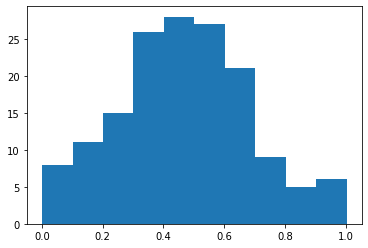

In [89]:
plt.hist(trunc_vgp_gp)

In [90]:
# corr, p-value
print('Correlation between Linear Model Residuals and VGP/GP')
print('125 ms: ',stats.pearsonr(trunc_resid_125, trunc_vgp_gp))
print('250 ms: ',stats.pearsonr(trunc_resid_250, trunc_vgp_gp))
print('1000 ms: ',stats.pearsonr(trunc_resid_1000, trunc_vgp_gp))

Correlation between Linear Model Residuals and VGP/GP
125 ms:  (0.022795817966095838, 0.7775858120408209)
250 ms:  (-0.09989981726106886, 0.2146723180120353)
1000 ms:  (-0.00930070162681125, 0.9082596891847373)


In [91]:
# corr, p-value
print('Correlation between Linear Model Residuals and VGP')
print('125 ms: ',stats.pearsonr(trunc_resid_125, trunc_vgp))
print('250 ms: ',stats.pearsonr(trunc_resid_250, trunc_vgp))
print('1000 ms: ',stats.pearsonr(trunc_resid_1000, trunc_vgp))

Correlation between Linear Model Residuals and VGP
125 ms:  (-0.05995256498488541, 0.4572068063899042)
250 ms:  (-0.15316100421300294, 0.056278412334716664)
1000 ms:  (-0.12446793611946572, 0.12159157090063621)


In [92]:
# corr, p-value
print('Correlation between Linear Model Residuals and GP')
print('125 ms: ',stats.pearsonr(trunc_resid_125, trunc_gp))
print('250 ms: ',stats.pearsonr(trunc_resid_250, trunc_gp))
print('1000 ms: ',stats.pearsonr(trunc_resid_1000, trunc_gp))

Correlation between Linear Model Residuals and GP
125 ms:  (-0.2250626988349685, 0.004731632520134384)
250 ms:  (-0.12240858201574958, 0.127929580268641)
1000 ms:  (-0.23695031169293126, 0.0028990977129283737)


#### Absolute value of residuals

In [93]:
# corr, p-value
print('Correlation between Abs(Linear Model Residuals) and VGP/GP')
print('125 ms: ',stats.pearsonr(np.abs(trunc_resid_125), trunc_vgp_gp))
print('250 ms: ',stats.pearsonr(np.abs(trunc_resid_250), trunc_vgp_gp))
print('1000 ms: ',stats.pearsonr(np.abs(trunc_resid_1000), trunc_vgp_gp))

# interp: clutter (pixel space)

Correlation between Abs(Linear Model Residuals) and VGP/GP
125 ms:  (-0.12933858688016497, 0.10756979552119636)
250 ms:  (-0.016346515826906764, 0.839495040602256)
1000 ms:  (-0.05633045162891588, 0.4848873565181206)


In [94]:
# corr, p-value
print('Correlation between Abs(Linear Model Residuals) and GP')
print('125 ms: ',stats.pearsonr(np.abs(trunc_resid_125), trunc_gp))
print('250 ms: ',stats.pearsonr(np.abs(trunc_resid_250), trunc_gp))
print('1000 ms: ',stats.pearsonr(np.abs(trunc_resid_1000), trunc_gp))

Correlation between Abs(Linear Model Residuals) and GP
125 ms:  (-0.09707677355148822, 0.22797687611471187)
250 ms:  (0.002296423247723214, 0.9773019096309028)
1000 ms:  (-0.09152719014738404, 0.25580290135009054)


In [95]:
# corr, p-value
print('Correlation between Abs(Linear Model Residuals) and VGP')
print('125 ms: ',stats.pearsonr(np.abs(trunc_resid_125), trunc_vgp))
print('250 ms: ',stats.pearsonr(np.abs(trunc_resid_250), trunc_vgp))
print('1000 ms: ',stats.pearsonr(np.abs(trunc_resid_1000), trunc_vgp))

Correlation between Abs(Linear Model Residuals) and VGP
125 ms:  (-0.13936834029089679, 0.08270733929265248)
250 ms:  (-0.00582648083968257, 0.9424522495370438)
1000 ms:  (-0.08375061521564305, 0.2985911083472283)


m: [-0.13964682]
b: 0.3740542912510086
R-squared:  0.016375160803279942


0.016

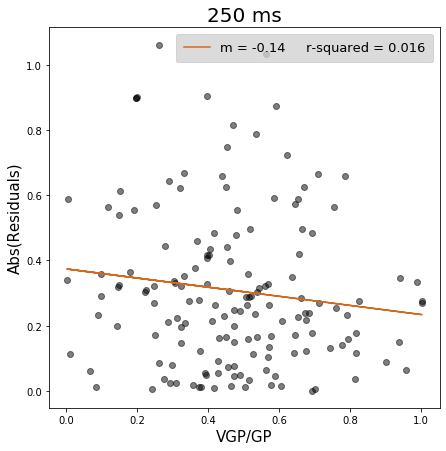

In [21]:
plt.figure(figsize = [7,7])
#run regression
X = np.array(trunc_vgp_gp).reshape(-1,1)
y = np.abs(trunc_resid_250)
reg = LinearRegression().fit(X, y)

#Generated Predictions
y_predicted = reg.predict(X)
#Plot Our Actual and Predicted Values
plt.plot(X, y, 'o', color='black', alpha = 0.5);
plt.plot(X,y_predicted,color='chocolate', label = 'm = ' + str(round(reg.coef_[0], 3))
         + '     r-squared = ' + str(round(float(reg.score(X, y)), 3)))
plt.title("250 ms", fontsize = 20)
plt.xlabel("VGP/GP", fontsize = 15)
plt.ylabel("Abs(Residuals)", fontsize = 15)

legend = plt.legend(loc = 0, fontsize = 13, borderpad = 0.6, labelspacing = 1)
legend.get_frame().set_facecolor('lightgray')


#get coefficients and y intercept
print("m: {0}".format(reg.coef_))
print("b: {0}".format(reg.intercept_))

#Returns the coefficient of determination R^2 of the prediction.
print("R-squared: ", reg.score(X, y))

round(float(reg.score(X, y)), 3)

#### Actual Depth

In [22]:
print('Correlation between Actual Depth and VGP/GP')
print(stats.pearsonr(trunc_actual, trunc_vgp_gp))
print('Correlation between Actual Depth and VGP')
print(stats.pearsonr(trunc_actual, trunc_vgp))
print('Correlation between Actual Depth and GP')
print(stats.pearsonr(trunc_actual, trunc_gp))

Correlation between Actual Depth and VGP/GP
(-0.08712410753715585, 0.2794809959214527)
Correlation between Actual Depth and VGP
(0.04754284307903838, 0.5556146971691864)
Correlation between Actual Depth and GP
(0.16743673736446738, 0.03668635251276759)


m: [-0.63475005]
b: 0.3355940853529787
R-squared:  0.03677569967673766


0.037

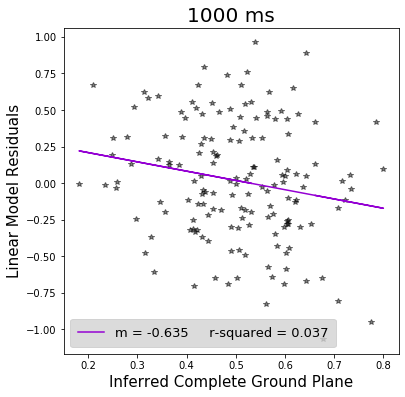

In [23]:
plt.figure(figsize = [6,6])
#run regression
X = np.array(trunc_gp).reshape(-1,1)
y = trunc_resid_1000
reg = LinearRegression().fit(X, y)

#Generated Predictions
y_predicted = reg.predict(X)
#Plot Our Actual and Predicted Values
plt.plot(X, y, '*', color='black', alpha = 0.5);
plt.plot(X,y_predicted,color='darkviolet', label = 'm = ' + str(round(reg.coef_[0], 3))
         + '     r-squared = ' + str(round(float(reg.score(X, y)), 3)))
plt.title("1000 ms", fontsize = 20)
plt.xlabel("Inferred Complete Ground Plane", fontsize = 15)
plt.ylabel("Linear Model Residuals", fontsize = 15)

legend = plt.legend(loc = 0, fontsize = 13, borderpad = 0.6, labelspacing = 1)
legend.get_frame().set_facecolor('lightgray')


#get coefficients and y intercept
print("m: {0}".format(reg.coef_))
print("b: {0}".format(reg.intercept_))

#Returns the coefficient of determination R^2 of the prediction.
print("R-squared: ", reg.score(X, y))

round(float(reg.score(X, y)), 3)

m: [-0.51215691]
b: 0.11630621082676999
R-squared:  0.021022506227678206


0.021

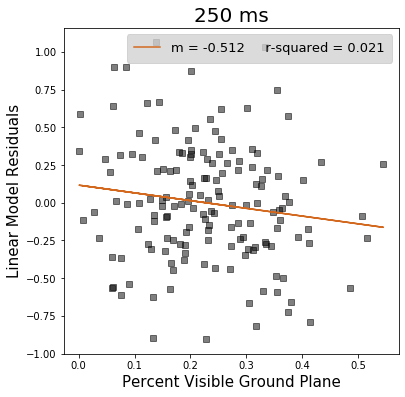

In [24]:
plt.figure(figsize = [6,6])
#run regression
X = np.array(trunc_vgp).reshape(-1,1)
y = trunc_resid_250
reg = LinearRegression().fit(X, y)

#Generated Predictions
y_predicted = reg.predict(X)
#Plot Our Actual and Predicted Values
plt.plot(X, y, 's', color='black', alpha = 0.5);
plt.plot(X,y_predicted,color='chocolate', label = 'm = ' + str(round(reg.coef_[0], 3))
         + '     r-squared = ' + str(round(float(reg.score(X, y)), 3)))
plt.title("250 ms", fontsize = 20)
plt.xlabel("Percent Visible Ground Plane", fontsize = 15)
plt.ylabel("Linear Model Residuals", fontsize = 15)

legend = plt.legend(loc = 0, fontsize = 13, borderpad = 0.6, labelspacing = 1)
legend.get_frame().set_facecolor('lightgray')


#get coefficients and y intercept
print("m: {0}".format(reg.coef_))
print("b: {0}".format(reg.intercept_))

#Returns the coefficient of determination R^2 of the prediction.
print("R-squared: ", reg.score(X, y))

round(float(reg.score(X, y)), 3)

m: [-0.02326416]
b: 0.00957489861140044
R-squared:  0.0001689286258971245


0.0

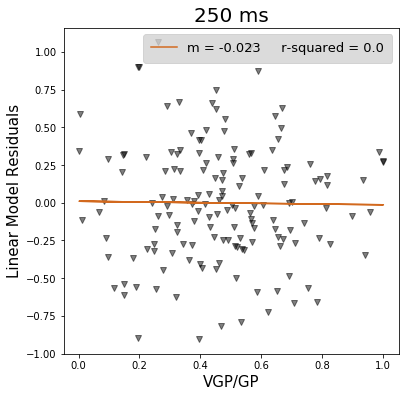

In [25]:
plt.figure(figsize = [6,6])
#run regression
X = np.array(trunc_vgp_gp).reshape(-1,1)
y = trunc_resid_250
reg = LinearRegression().fit(X, y)

#Generated Predictions
y_predicted = reg.predict(X)
#Plot Our Actual and Predicted Values
plt.plot(X, y, 'v', color='black', alpha = 0.5);
plt.plot(X,y_predicted,color='chocolate', label = 'm = ' + str(round(reg.coef_[0], 3))
         + '     r-squared = ' + str(round(float(reg.score(X, y)), 3)))
plt.title("250 ms", fontsize = 20)
plt.xlabel("VGP/GP", fontsize = 15)
plt.ylabel("Linear Model Residuals", fontsize = 15)

legend = plt.legend(loc = 0, fontsize = 13, borderpad = 0.6, labelspacing = 1)
legend.get_frame().set_facecolor('lightgray')


#get coefficients and y intercept
print("m: {0}".format(reg.coef_))
print("b: {0}".format(reg.intercept_))

#Returns the coefficient of determination R^2 of the prediction.
print("R-squared: ", reg.score(X, y))

round(float(reg.score(X, y)), 3)

## Global Mean Depth

In [26]:
kinect192_path = '/Users/prachimahableshwarkar/Documents/GW/SUNRGBD/updated/kinect2data_192'

stimuli_path = '/Users/prachimahableshwarkar/Documents/GW/Depth_MTurk/depth_duration_stimuli'

In [27]:
globalMeanDepths = []
for folder in stimfolder_250:
    for file in os.listdir(kinect192_path + '/' + folder + '/depth_bfx'):
        if 'png' in file:
            dm = Image.open(kinect192_path + '/' + folder + '/depth_bfx/' + file)
            dm.load()
            depth_data = np.asarray(dm)/8000
            globalMeanDepths.append(np.mean(depth_data))

In [28]:
trunc_globalMeanDepths = []

for i in range(len(ordered_gp_metrics)):
    metrics = ordered_gp_metrics[i]
    if type(metrics) == list:
        trunc_globalMeanDepths.append(globalMeanDepths[i])


In [29]:
print('Correlation between Global Mean Depth and Complete Ground Plane')
print(stats.pearsonr(trunc_globalMeanDepths, trunc_gp))

Correlation between Global Mean Depth and Complete Ground Plane
(0.2999983504198189, 0.00014188365894478912)


m: [0.08390167]
b: 0.2844751501870868
R-squared:  0.08999901025461221


0.09

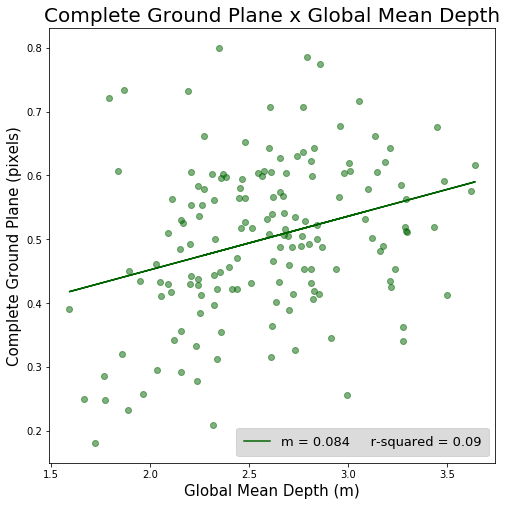

In [30]:
plt.figure(figsize = [8,8])
#run regression
X = np.array(trunc_globalMeanDepths).reshape(-1,1)
y = trunc_gp
reg = LinearRegression().fit(X, y)

#Generated Predictions
y_predicted = reg.predict(X)
#Plot Our Actual and Predicted Values
plt.plot(X, y, 'o', color='darkgreen', alpha = 0.5);
plt.plot(X,y_predicted,color='darkgreen', label = 'm = ' + str(round(reg.coef_[0], 3))
         + '     r-squared = ' + str(round(float(reg.score(X, y)), 3)))
plt.title("Complete Ground Plane x Global Mean Depth", fontsize = 20)
plt.xlabel("Global Mean Depth (m)", fontsize = 15)
plt.ylabel("Complete Ground Plane (pixels)", fontsize = 15)

legend = plt.legend(loc = 0, fontsize = 13, borderpad = 0.6, labelspacing = 1)
legend.get_frame().set_facecolor('lightgray')


#get coefficients and y intercept
print("m: {0}".format(reg.coef_))
print("b: {0}".format(reg.intercept_))

#Returns the coefficient of determination R^2 of the prediction.
print("R-squared: ", reg.score(X, y))

round(float(reg.score(X, y)), 3)

## Load Ground Plane Metrics: Pixel SA

In [6]:
path = '/Users/prachimahableshwarkar/Documents/GW/Depth_MTurk/SUN_scene_cue_coding/VGP_size_dict.json'
vgp_size_dict = json.load(open(path))


In [7]:
path = '/Users/prachimahableshwarkar/Documents/GW/Depth_MTurk/SUN_scene_cue_coding/GP_size_dict.json'
gp_size_dict = json.load(open(path))

In [10]:
ordered_gp_size = []
ordered_vgp_size = []

gp_none = 0
vgp_none = 0
for folder in stimfolder_250:
    try:
        ordered_gp_size.append(gp_size_dict[folder])
    except:
        gp_none += 1
        ordered_gp_size.append(None)
    try:
        ordered_vgp_size.append(vgp_size_dict[folder])
    except:
        vgp_none += 1
        ordered_vgp_size.append(None)

In [17]:
len(ordered_gp_size), gp_none

(156, 5)

In [14]:
len(ordered_vgp_size), vgp_none

(156, 5)

In [15]:
actual_depth_values = []
for i in range(len(stim_250)):
    targetobj_num = stim_250[i].split('/')[1][-1]
    folder = stimfolder_250[i]
    p = '/Users/prachimahableshwarkar/Documents/GW/Depth_MTurk/depth_duration_stimuli/' + folder + "_" +targetobj_num
    # JSON file
    f = open (p + '/data.json', "r")
    # Reading from file
    data = json.loads(f.read())
    depthval = data['objects'][0]['crossing_point'][0]['depth']
    actual_depth_values.append(depthval)
len(actual_depth_values)

156

In [51]:
for i in range(len(ordered_vgp_size)):
    print(ordered_vgp_size[i], ordered_gp_size[i], ordered_vgp_size[i]/ordered_gp_size[i])

0.11426755705916493 0.14543319826619244 0.78570476632176
3.324017453176732 4.230618924125869 0.7857047663217601
15.39335620662437 19.591781628979604 0.78570476632176
1.7327510525712313 2.205346240526227 0.7857047663217601
3.726986045993394 4.743494256043659 0.78570476632176
7.2627265725412355 9.243582174690562 0.7857047663217601
1.5628404798087552 1.9890938006207082 0.7857047663217601
2.522758417958123 3.2108223420462343 0.78570476632176
10.802227447712218 13.748456049569787 0.78570476632176
3.4799404733624923 4.429068808699825 0.78570476632176
13.531205181785591 17.221742519306957 0.78570476632176
7.2491005507562845 9.226239755032426 0.78570476632176
5.279188955921483 6.719049167330062 0.7857047663217601
9.070479181724249 11.544386098339801 0.78570476632176
17.888989165005338 22.76808024056135 0.78570476632176
4.716127445754514 6.002416744692594 0.7857047663217601
0.7905022607613221 1.0061059759914928 0.78570476632176
5.491874783279982 6.9897434999534696 0.7857047663217601
13.35854683

TypeError: unsupported operand type(s) for /: 'NoneType' and 'NoneType'

In [52]:
trunc_resid_125 = []
trunc_resid_250 = []
trunc_resid_1000 = []

trunc_vgpSize_gpSize = []
trunc_vgpSize = []
trunc_gpSize = []
trunc_actual = []

for i in range(len(actual_depth_values)):
    if type(ordered_gp_size[i]) == float:        
        trunc_vgpSize_gpSize.append(ordered_vgp_size[i]/ordered_gp_size[i])
        trunc_vgpSize.append(ordered_vgp_size[i])
        trunc_gpSize.append(ordered_gp_size[i])
        
        trunc_resid_125.append(residuals_125[i])        
        trunc_resid_250.append(residuals_250[i])
        trunc_resid_1000.append(residuals_1000[i])
        
        trunc_actual.append(actual_depth_values[i])
         


In [53]:
len(trunc_vgpSize_gpSize), len(trunc_resid_250)

(151, 151)

In [55]:
# corr, p-value
print('Correlation between Linear Model Residuals and VGP/GP')
print('125 ms: ',stats.pearsonr(trunc_resid_125, trunc_vgpSize_gpSize))
print('250 ms: ',stats.pearsonr(trunc_resid_250, trunc_vgpSize_gpSize))
print('1000 ms: ',stats.pearsonr(trunc_resid_1000, trunc_vgpSize_gpSize))

Correlation between Linear Model Residuals and VGP/GP
125 ms:  (0.012155738261592837, 0.882235105879094)
250 ms:  (-0.02246100669360763, 0.784279480502968)
1000 ms:  (-0.0012939010270963947, 0.9874197936902682)


/Users/prachimahableshwarkar/opt/anaconda3/envs/defaultenv/lib/python3.7/site-packages/scipy/stats/stats.py:3429: PearsonRNearConstantInputWarning: An input array is nearly constant; the computed correlation coefficent may be inaccurate.
  warnings.warn(PearsonRNearConstantInputWarning())


In [56]:
# corr, p-value
print('Correlation between Linear Model Residuals and VGP')
print('125 ms: ',stats.pearsonr(trunc_resid_125, trunc_vgpSize))
print('250 ms: ',stats.pearsonr(trunc_resid_250, trunc_vgpSize))
print('1000 ms: ',stats.pearsonr(trunc_resid_1000, trunc_vgpSize))

Correlation between Linear Model Residuals and VGP
125 ms:  (-0.06920073122171479, 0.3985022034211193)
250 ms:  (-0.14527425433576396, 0.07511203739693953)
1000 ms:  (-0.1466749958630172, 0.07231538453578812)


In [43]:
# corr, p-value
print('Correlation between Linear Model Residuals and GP')
print('125 ms: ',stats.pearsonr(trunc_resid_125, trunc_gpSize))
print('250 ms: ',stats.pearsonr(trunc_resid_250, trunc_gpSize))
print('1000 ms: ',stats.pearsonr(trunc_resid_1000, trunc_gpSize))

Correlation between Linear Model Residuals and GP
125 ms:  (-0.06920073122171479, 0.3985022034211193)
250 ms:  (-0.14527425433576396, 0.07511203739693953)
1000 ms:  (-0.14667499586301724, 0.07231538453578829)


#### Absolute value of residuals

In [57]:
# corr, p-value
print('Correlation between Abs(Linear Model Residuals) and VGP/GP')
print('125 ms: ',stats.pearsonr(np.abs(trunc_resid_125), trunc_vgpSize_gpSize))
print('250 ms: ',stats.pearsonr(np.abs(trunc_resid_250), trunc_vgpSize_gpSize))
print('1000 ms: ',stats.pearsonr(np.abs(trunc_resid_1000), trunc_vgpSize_gpSize))

# interp: clutter (pixel space)

Correlation between Abs(Linear Model Residuals) and VGP/GP
125 ms:  (-0.01928848914337732, 0.8141519307340891)
250 ms:  (-0.025625393708933228, 0.7547937548756846)
1000 ms:  (-0.012591445511828014, 0.8780460977532439)


In [58]:
# corr, p-value
print('Correlation between Abs(Linear Model Residuals) and GP')
print('125 ms: ',stats.pearsonr(np.abs(trunc_resid_125), trunc_gpSize))
print('250 ms: ',stats.pearsonr(np.abs(trunc_resid_250), trunc_gpSize))
print('1000 ms: ',stats.pearsonr(np.abs(trunc_resid_1000), trunc_gpSize))

Correlation between Abs(Linear Model Residuals) and GP
125 ms:  (-0.018906361884705104, 0.817769094861671)
250 ms:  (-0.03876184998492187, 0.6365462885730222)
1000 ms:  (0.04169552214256396, 0.611224287285285)


In [48]:
# corr, p-value
print('Correlation between Abs(Linear Model Residuals) and VGP')
print('125 ms: ',stats.pearsonr(np.abs(trunc_resid_125), trunc_vgpSize))
print('250 ms: ',stats.pearsonr(np.abs(trunc_resid_250), trunc_vgpSize))
print('1000 ms: ',stats.pearsonr(np.abs(trunc_resid_1000), trunc_vgpSize))

Correlation between Abs(Linear Model Residuals) and VGP
125 ms:  (-0.018906361884705094, 0.817769094861671)
250 ms:  (-0.038761849984921874, 0.6365462885730222)
1000 ms:  (0.04169552214256392, 0.6112242872852822)


m: [-1.01144182e+14]
b: 79469466180321.45
R-squared:  0.0012236421173623668


0.001

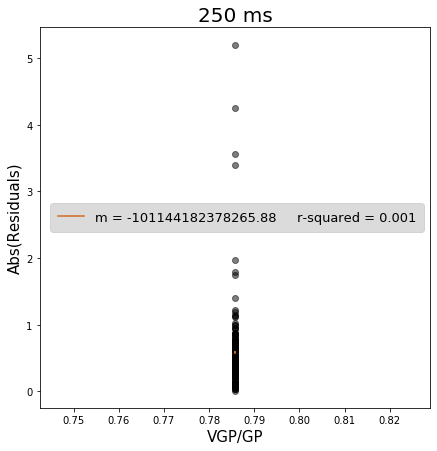

In [60]:
plt.figure(figsize = [7,7])
#run regression
X = np.array(trunc_vgpSize_gpSize).reshape(-1,1)
y = np.abs(trunc_resid_250)
reg = LinearRegression().fit(X, y)

#Generated Predictions
y_predicted = reg.predict(X)
#Plot Our Actual and Predicted Values
plt.plot(X, y, 'o', color='black', alpha = 0.5);
plt.plot(X,y_predicted,color='chocolate', label = 'm = ' + str(round(reg.coef_[0], 3))
         + '     r-squared = ' + str(round(float(reg.score(X, y)), 3)))
plt.title("250 ms", fontsize = 20)
plt.xlabel("VGP/GP", fontsize = 15)
plt.ylabel("Abs(Residuals)", fontsize = 15)

legend = plt.legend(loc = 0, fontsize = 13, borderpad = 0.6, labelspacing = 1)
legend.get_frame().set_facecolor('lightgray')


#get coefficients and y intercept
print("m: {0}".format(reg.coef_))
print("b: {0}".format(reg.intercept_))

#Returns the coefficient of determination R^2 of the prediction.
print("R-squared: ", reg.score(X, y))

round(float(reg.score(X, y)), 3)

#### Actual Depth

In [61]:
print('Correlation between Actual Depth and VGP/GP')
print(stats.pearsonr(trunc_actual, trunc_vgpSize_gpSize))
print('Correlation between Actual Depth and VGP')
print(stats.pearsonr(trunc_actual, trunc_vgpSize))
print('Correlation between Actual Depth and GP')
print(stats.pearsonr(trunc_actual, trunc_gpSize))

Correlation between Actual Depth and VGP/GP
(0.00172362009483725, 0.9832422981967593)
Correlation between Actual Depth and VGP
(0.14659319612582528, 0.07247634775275881)
Correlation between Actual Depth and GP
(0.14659319612582528, 0.07247634775275881)


/Users/prachimahableshwarkar/opt/anaconda3/envs/defaultenv/lib/python3.7/site-packages/scipy/stats/stats.py:3429: PearsonRNearConstantInputWarning: An input array is nearly constant; the computed correlation coefficent may be inaccurate.
  warnings.warn(PearsonRNearConstantInputWarning())


m: [-0.01019709]
b: 0.09477649213183946
R-squared:  0.02151355441141589


0.022

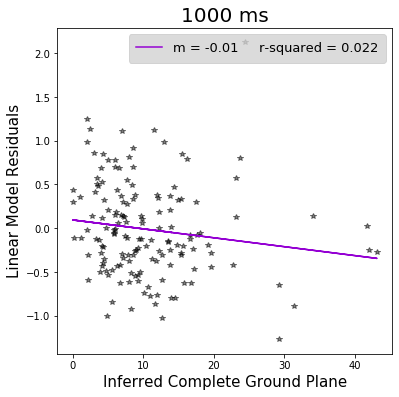

In [62]:
plt.figure(figsize = [6,6])
#run regression
X = np.array(trunc_gpSize).reshape(-1,1)
y = trunc_resid_1000
reg = LinearRegression().fit(X, y)

#Generated Predictions
y_predicted = reg.predict(X)
#Plot Our Actual and Predicted Values
plt.plot(X, y, '*', color='black', alpha = 0.5);
plt.plot(X,y_predicted,color='darkviolet', label = 'm = ' + str(round(reg.coef_[0], 3))
         + '     r-squared = ' + str(round(float(reg.score(X, y)), 3)))
plt.title("1000 ms", fontsize = 20)
plt.xlabel("Inferred Complete Ground Plane", fontsize = 15)
plt.ylabel("Linear Model Residuals", fontsize = 15)

legend = plt.legend(loc = 0, fontsize = 13, borderpad = 0.6, labelspacing = 1)
legend.get_frame().set_facecolor('lightgray')


#get coefficients and y intercept
print("m: {0}".format(reg.coef_))
print("b: {0}".format(reg.intercept_))

#Returns the coefficient of determination R^2 of the prediction.
print("R-squared: ", reg.score(X, y))

round(float(reg.score(X, y)), 3)

m: [-0.02173038]
b: 0.19225193391203416
R-squared:  0.02110460897281219


0.021

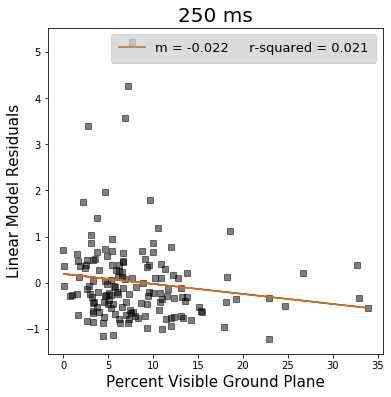

In [63]:
plt.figure(figsize = [6,6])
#run regression
X = np.array(trunc_vgpSize).reshape(-1,1)
y = trunc_resid_250
reg = LinearRegression().fit(X, y)

#Generated Predictions
y_predicted = reg.predict(X)
#Plot Our Actual and Predicted Values
plt.plot(X, y, 's', color='black', alpha = 0.5);
plt.plot(X,y_predicted,color='chocolate', label = 'm = ' + str(round(reg.coef_[0], 3))
         + '     r-squared = ' + str(round(float(reg.score(X, y)), 3)))
plt.title("250 ms", fontsize = 20)
plt.xlabel("Percent Visible Ground Plane", fontsize = 15)
plt.ylabel("Linear Model Residuals", fontsize = 15)

legend = plt.legend(loc = 0, fontsize = 13, borderpad = 0.6, labelspacing = 1)
legend.get_frame().set_facecolor('lightgray')


#get coefficients and y intercept
print("m: {0}".format(reg.coef_))
print("b: {0}".format(reg.intercept_))

#Returns the coefficient of determination R^2 of the prediction.
print("R-squared: ", reg.score(X, y))

round(float(reg.score(X, y)), 3)

m: [-0.02173038]
b: 0.19225193391203416
R-squared:  0.02110460897281219


0.021

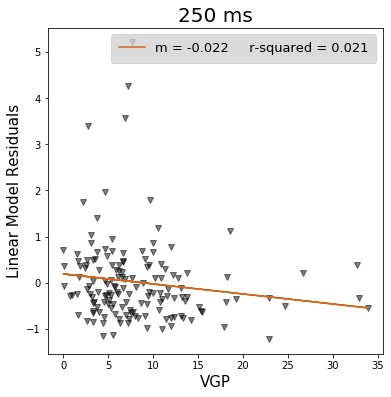

In [71]:
plt.figure(figsize = [6,6])
#run regression
X = np.array(trunc_vgpSize).reshape(-1,1)
y = trunc_resid_250
reg = LinearRegression().fit(X, y)

#Generated Predictions
y_predicted = reg.predict(X)
#Plot Our Actual and Predicted Values
plt.plot(X, y, 'v', color='black', alpha = 0.5);
plt.plot(X,y_predicted,color='chocolate', label = 'm = ' + str(round(reg.coef_[0], 3))
         + '     r-squared = ' + str(round(float(reg.score(X, y)), 3)))
plt.title("250 ms", fontsize = 20)
plt.xlabel("VGP", fontsize = 15)
plt.ylabel("Linear Model Residuals", fontsize = 15)

legend = plt.legend(loc = 0, fontsize = 13, borderpad = 0.6, labelspacing = 1)
legend.get_frame().set_facecolor('lightgray')


#get coefficients and y intercept
print("m: {0}".format(reg.coef_))
print("b: {0}".format(reg.intercept_))

#Returns the coefficient of determination R^2 of the prediction.
print("R-squared: ", reg.score(X, y))

round(float(reg.score(X, y)), 3)

## Global Mean Depth

In [65]:
kinect192_path = '/Users/prachimahableshwarkar/Documents/GW/SUNRGBD/updated/kinect2data_192'

stimuli_path = '/Users/prachimahableshwarkar/Documents/GW/Depth_MTurk/depth_duration_stimuli'

In [66]:
globalMeanDepths = []
for folder in stimfolder_250:
    for file in os.listdir(kinect192_path + '/' + folder + '/depth_bfx'):
        if 'png' in file:
            dm = Image.open(kinect192_path + '/' + folder + '/depth_bfx/' + file)
            dm.load()
            depth_data = np.asarray(dm)/8000
            globalMeanDepths.append(np.mean(depth_data))

In [68]:
trunc_globalMeanDepths = []

for i in range(len(ordered_gp_size)):
    if type(ordered_gp_size[i]) == float:
        trunc_globalMeanDepths.append(globalMeanDepths[i])


In [69]:
print('Correlation between Global Mean Depth and Complete Ground Plane')
print(stats.pearsonr(trunc_globalMeanDepths, trunc_gpSize))

Correlation between Global Mean Depth and Complete Ground Plane
(0.43006646511463287, 3.565777796164535e-08)


m: [7.69468136]
b: -9.226704212790844
R-squared:  0.18495716441619559


0.185

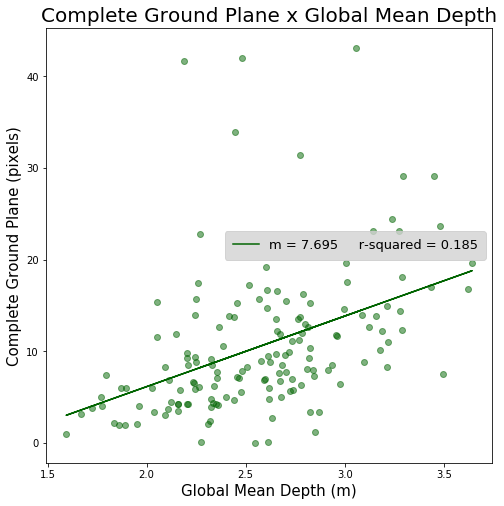

In [70]:
plt.figure(figsize = [8,8])
#run regression
X = np.array(trunc_globalMeanDepths).reshape(-1,1)
y = trunc_gpSize
reg = LinearRegression().fit(X, y)

#Generated Predictions
y_predicted = reg.predict(X)
#Plot Our Actual and Predicted Values
plt.plot(X, y, 'o', color='darkgreen', alpha = 0.5);
plt.plot(X,y_predicted,color='darkgreen', label = 'm = ' + str(round(reg.coef_[0], 3))
         + '     r-squared = ' + str(round(float(reg.score(X, y)), 3)))
plt.title("Complete Ground Plane x Global Mean Depth", fontsize = 20)
plt.xlabel("Global Mean Depth (m)", fontsize = 15)
plt.ylabel("Complete Ground Plane (pixels)", fontsize = 15)

legend = plt.legend(loc = 0, fontsize = 13, borderpad = 0.6, labelspacing = 1)
legend.get_frame().set_facecolor('lightgray')


#get coefficients and y intercept
print("m: {0}".format(reg.coef_))
print("b: {0}".format(reg.intercept_))

#Returns the coefficient of determination R^2 of the prediction.
print("R-squared: ", reg.score(X, y))

round(float(reg.score(X, y)), 3)

# Extrinsics

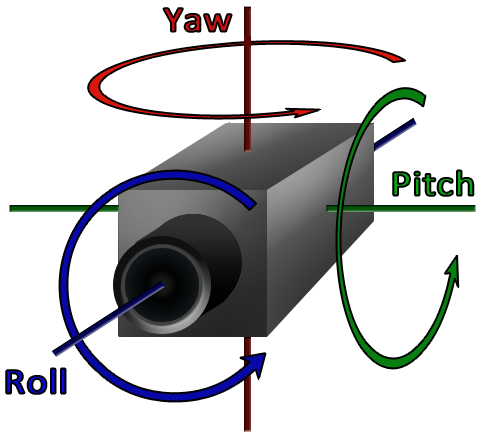

In [39]:
#converts the rotation matrix in extrinsics.txt from string to a numpy array 
def rotationmatrix(matrix_path):
    matrixtext = open(matrix_path).read()
    
    x00 = float(matrixtext.split('\t')[0].split(' ')[0])
    x01 = float(matrixtext.split('\n')[0].split(' ')[1])
    x02 = float(matrixtext.split('\n')[0].split(' ')[2])
    
    x10 = float(matrixtext.split('\n')[1].split(' ')[0])
    x11 = float(matrixtext.split('\n')[1].split(' ')[1])
    x12 = float(matrixtext.split('\n')[1].split(' ')[2])
    
    x20 = float(matrixtext.split('\n')[2].split(' ')[0])
    x21 = float(matrixtext.split('\n')[2].split(' ')[1])
    x22 = float(matrixtext.split('\n')[2].split(' ')[2])
    
    #list of the matrix values excluding the 3rd column of just zeroes 
    matrixlist = [[x00, x01, x02], [x10, x11, x12], [x20, x21, x22]]
    
    #creates 3x3 array of the rotation matrix
    matrixarray = np.full((3,3), matrixlist)
    
    return matrixarray

def rotationMatrixToEulerAngles(path):
    R = rotationmatrix(path)
    #assert(isRotationMatrix(R))
    sy = math.sqrt(R[0,0] * R[0,0] +  R[1,0] * R[1,0])
    singular = sy < 1e-6
    if  not singular :
        x = math.atan2(R[2,1] , R[2,2])
        y = math.atan2(-R[2,0], sy)
        z = math.atan2(R[1,0], R[0,0])
    else :
        x = math.atan2(-R[1,2], R[1,1])
        y = math.atan2(-R[2,0], sy)
        z = 0
    return np.array([x, y, z])

# Output - final pitch, roll, yaw values in radians and degrees 
def imageExtrinsics(path):
    in_array = rotationMatrixToEulerAngles(path)
    #print ("Radian values : \n", in_array) 

    degree_Values = np.degrees(in_array) 
    
    return degree_Values[0], degree_Values[1], degree_Values[2]


def extrinsics_distribution(path, kinectv2):
    targetfolder = path.split('/')[1]
    if len(targetfolder) == 59:     
        imagefolder = path.split('/')[1][:-2]
    else:
        imagefolder = path.split('/')[1][:-3]

    extpath = kinectv2 + '/' + imagefolder + '/extrinsics' 
    fname = os.listdir(extpath)[0]
    if fname != '.ipynb_checkpoints':
        extrinsics = imageExtrinsics(extpath + '/' + fname)
    # pitch, roll, yaw
    return extrinsics[0], extrinsics[1], extrinsics[2]

In [40]:
# kinectv2_path = '/Users/prachi/Documents/depth_duration/SUNRGBD/kv2/kinect2data'
kinectv2_path = '/Users/prachimahableshwarkar/Documents/GW/SUNRGBD/updated/kinect2data_192'
# line comprehension for x(stim path) in final_x 

pitches = [extrinsics_distribution(path, kinectv2_path)[0] for path in stim_250]
rolls = [extrinsics_distribution(path, kinectv2_path)[1] for path in stim_250]
yaws = [extrinsics_distribution(path, kinectv2_path)[2] for path in stim_250]



In [41]:
trunc_pitches = []
trunc_rolls = []
trunc_yaws = []

for i in range(len(ordered_gp_metrics)):
    metrics = ordered_gp_metrics[i]
    if type(metrics) == list:
        trunc_pitches.append(pitches[i])
        trunc_rolls.append(rolls[i])
        trunc_yaws.append(yaws[i])

In [42]:
print('Correlation between Complete Ground Plane and Pitch')
print(stats.pearsonr(trunc_gp, trunc_pitches))

Correlation between Complete Ground Plane and Pitch
(-0.24556062057426326, 0.00200267048192746)


In [43]:
print('Correlation between Complete Ground Plane and Roll')
print(stats.pearsonr(trunc_gp, trunc_rolls))

Correlation between Complete Ground Plane and Roll
(0.10249815887246476, 0.20292515242437625)


In [44]:
print('Correlation between Complete Ground Plane and Yaw')
print(stats.pearsonr(trunc_gp, trunc_yaws))

Correlation between Complete Ground Plane and Yaw
(0.06637340997880946, 0.4103688725357515)


m: [-0.00629131]
b: 0.36864139069107216
R-squared:  0.0603000183768172


0.06

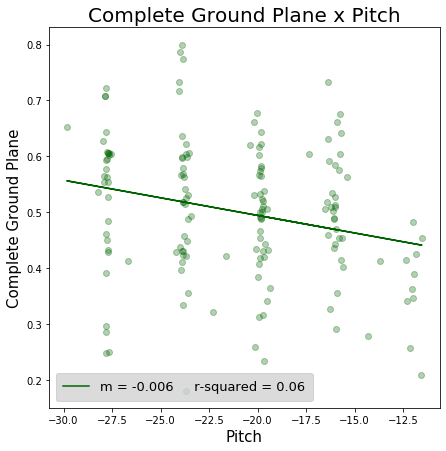

In [38]:
plt.figure(figsize = [7,7])
#run regression
X = np.array(trunc_pitches).reshape(-1,1)
y = np.abs(trunc_gp)
reg = LinearRegression().fit(X, y)

#Generated Predictions
y_predicted = reg.predict(X)
#Plot Our Actual and Predicted Values
plt.plot(X, y, 'o', color='darkgreen', alpha = 0.3, marker = 'o');
plt.plot(X,y_predicted,color='darkgreen', label = 'm = ' + str(round(reg.coef_[0], 3))
         + '     r-squared = ' + str(round(float(reg.score(X, y)), 3)))
plt.title("Complete Ground Plane x Pitch", fontsize = 20)
plt.xlabel("Pitch", fontsize = 15)
plt.ylabel("Complete Ground Plane", fontsize = 15)

legend = plt.legend(loc = 0, fontsize = 13, borderpad = 0.6, labelspacing = 1)
legend.get_frame().set_facecolor('lightgray')


#get coefficients and y intercept
print("m: {0}".format(reg.coef_))
print("b: {0}".format(reg.intercept_))

#Returns the coefficient of determination R^2 of the prediction.
print("R-squared: ", reg.score(X, y))

round(float(reg.score(X, y)), 3)